In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

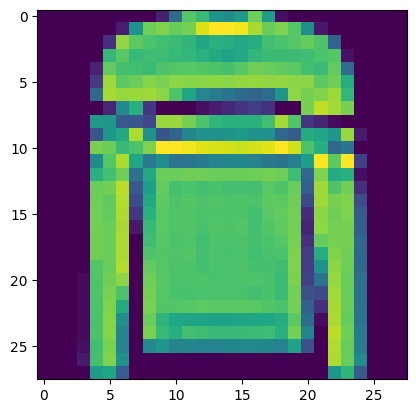

In [5]:
plt.imshow(train_images[5])

In [6]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [7]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [8]:
train_labels[12]

5

In [9]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Modelo de datos

In [10]:
# Definir el modelo secuencial
model = tf.keras.Sequential()

# Añadir la capa de entrada explícita
model.add(Input(shape=(28, 28, 1)))  # Definir explícitamente la capa de entrada

# Añadir las capas convolucionales y densas
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

## Compilar - entrenar

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
               metrics=['accuracy']                
              )

In [12]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.6932 - loss: 0.8215
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8511 - loss: 0.4142
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8692 - loss: 0.3654
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8790 - loss: 0.3382
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8834 - loss: 0.3249
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8883 - loss: 0.3118
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8877 - loss: 0.3154
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8958 - loss: 0.2939
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8936 - loss: 0.2939
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8968 - loss: 0.2921


In [13]:
model.evaluate(test_images, test_labels, verbose=0)

[0.2643195390701294, 0.910099983215332]